# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
# Read the data
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the training data
df.shape

(40000, 41)

<IPython.core.display.Javascript object>

- The training dataset has 40,000 observations and 41 features.

In [4]:
# Checking the number of rows and columns in the test data
df_test.shape

(10000, 41)

<IPython.core.display.Javascript object>

- The test dataset has 10,000 observations and 41 features.

## Data Overview

In [5]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [6]:
# let's create a copy of the testing data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [7]:
# let's view the first 5 rows of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


<IPython.core.display.Javascript object>

In [8]:
# let's view the last 5 rows of the data
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


<IPython.core.display.Javascript object>

- All features have both positive and negative values.
- The target variables are as follows:
    - No Failure - 0 
    - Failure - 1

In [9]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

- All features other than the target variable (discrete/categorical) are continuous variables.

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- The data has no duplicate values.

In [11]:
# let's check for missing values in the data
data.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

- In the training data, only variables one and two have missing values.
    - V1 - 46 missing values
    - V2 - 39 missing values

In [12]:
# let's check for missing values in the data
data_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

- In the testing data, only variables one and two have missing values.
    - V1 - 11 missing values
    - V2 - 7 missing values

In [85]:
# let's view the statistical summary of the numerical columns in the data
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,39954.000,39961.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,-0.288,0.443,2.506,-0.066,-0.045,-1.001,-0.893,-0.563,-0.008,-0.002,-1.918,1.578,1.591,-0.947,-2.436,-2.943,-0.143,1.189,1.181,0.027,-3.621,0.943,-0.388,1.142,-0.003,1.896,-0.617,-0.888,-1.005,-0.033,0.506,0.327,0.057,-0.464,2.235,1.530,-0.000,-0.351,0.900,-0.897,0.055
std,3.449,3.139,3.406,3.437,2.107,2.037,1.757,3.299,2.162,2.183,3.116,2.915,2.865,1.788,3.341,4.212,3.344,2.586,3.395,3.675,3.557,1.646,4.052,3.913,2.025,3.421,4.392,1.925,2.676,3.031,3.483,5.499,3.574,3.186,2.924,3.820,1.778,3.964,1.751,2.998,0.227
min,-13.502,-13.212,-11.469,-16.015,-8.613,-10.227,-8.206,-15.658,-8.596,-11.001,-14.832,-13.619,-13.830,-8.309,-17.202,-21.919,-17.634,-11.644,-13.492,-13.923,-19.436,-10.122,-16.188,-18.488,-8.228,-12.588,-14.905,-9.685,-12.579,-14.796,-19.377,-23.201,-17.454,-17.985,-15.350,-17.479,-7.640,-17.375,-7.136,-11.930,0.000
25%,-2.751,-1.638,0.203,-2.350,-1.507,-2.363,-2.037,-2.660,-1.494,-1.391,-3.941,-0.431,-0.209,-2.165,-4.451,-5.632,-2.227,-0.403,-1.051,-2.434,-5.921,-0.112,-3.119,-1.483,-1.373,-0.319,-3.692,-2.193,-2.799,-1.908,-1.799,-3.392,-2.238,-2.128,0.332,-0.937,-1.266,-3.017,-0.262,-2.950,0.000
50%,-0.774,0.464,2.265,-0.124,-0.097,-1.007,-0.935,-0.384,-0.052,0.106,-1.942,1.485,1.654,-0.957,-2.399,-2.719,-0.028,0.867,1.278,0.030,-3.559,0.963,-0.275,0.964,0.021,1.964,-0.910,-0.905,-1.206,0.185,0.491,0.056,-0.050,-0.251,2.110,1.572,-0.133,-0.319,0.921,-0.949,0.000
75%,1.837,2.538,4.585,2.149,1.346,0.374,0.207,1.714,1.426,1.486,0.089,3.541,3.476,0.266,-0.382,-0.113,2.072,2.564,3.497,2.513,-1.284,2.018,2.438,3.563,1.400,4.163,2.201,0.377,0.604,2.040,2.778,3.789,2.256,1.433,4.045,3.997,1.161,2.291,2.069,1.092,0.000
max,17.437,13.089,18.366,13.280,9.403,7.065,8.006,11.679,8.507,8.108,13.852,15.754,15.420,6.213,12.875,13.583,17.405,13.180,16.059,16.052,13.840,7.410,15.080,19.769,8.223,16.836,21.595,6.907,11.852,13.191,17.255,24.848,16.692,14.358,16.805,19.330,7.803,15.964,7.998,10.654,1.000


<IPython.core.display.Javascript object>

- As all the features are ciphered there is no proper interpretation that can be inferred from the statistical summary.
- Basic Observations:
    - All features range from negative to positive values.
    - Variables one and two have some missing values.

## EDA

### Univariate Analysis 

### Plotting histograms and boxplots for all the variables

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

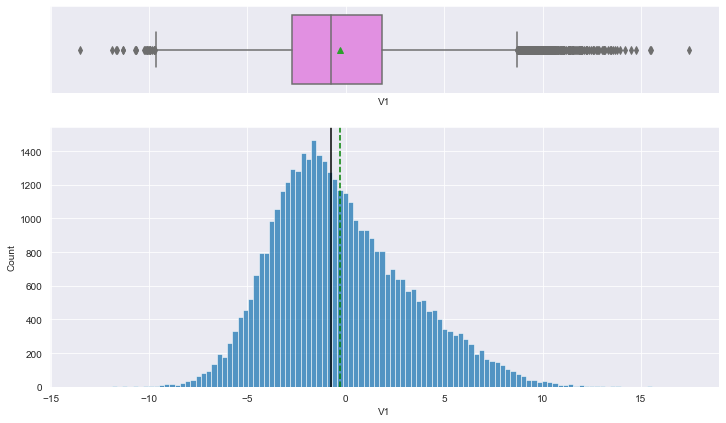

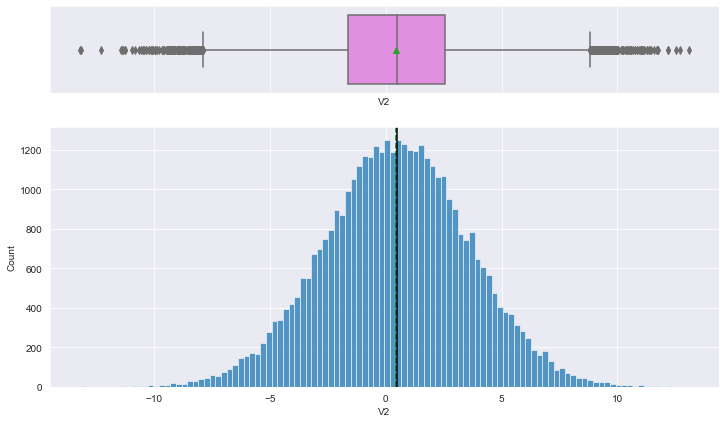

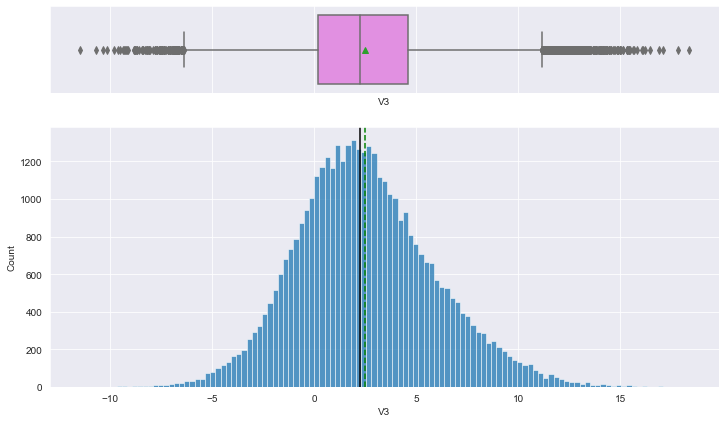

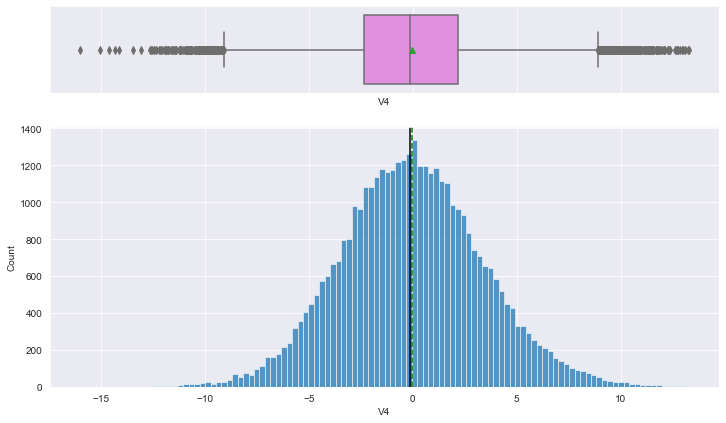

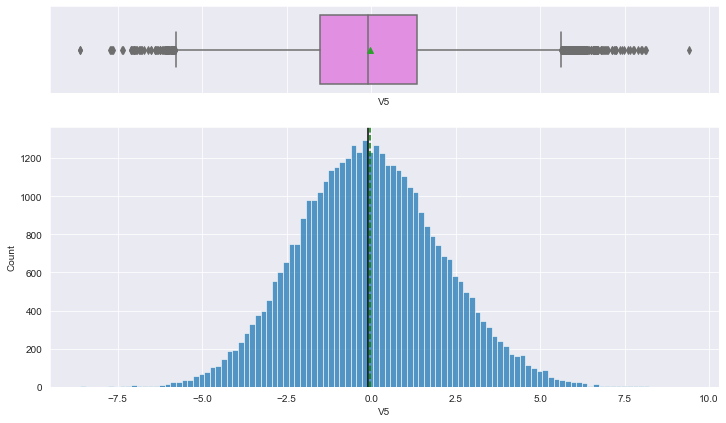

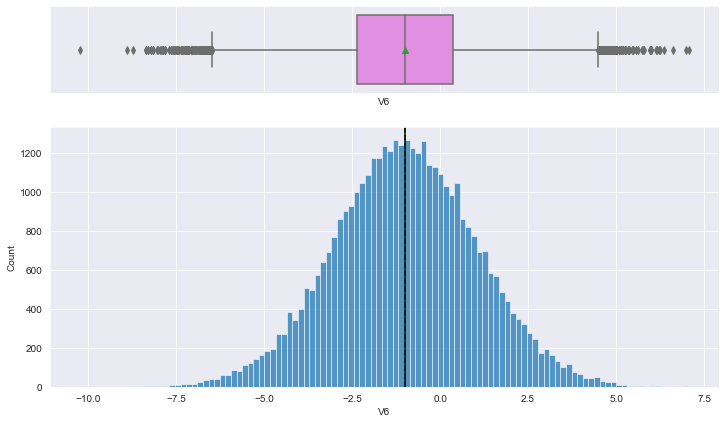

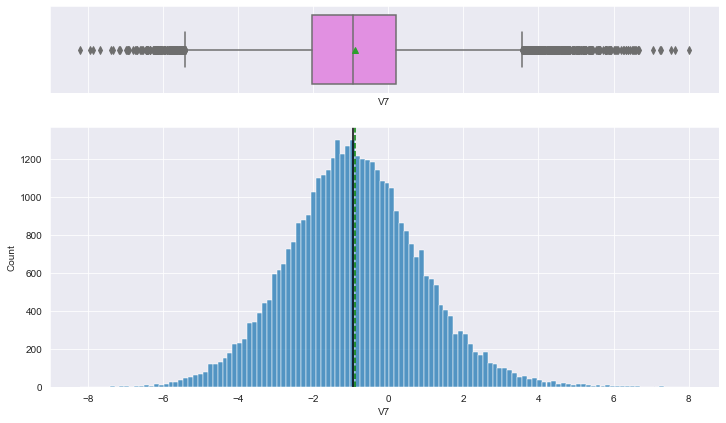

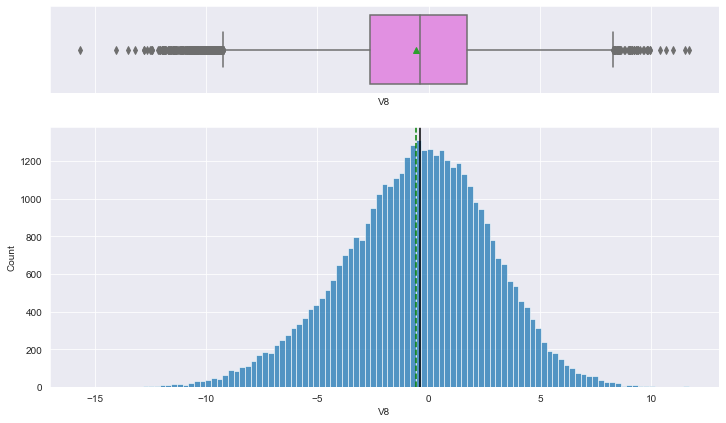

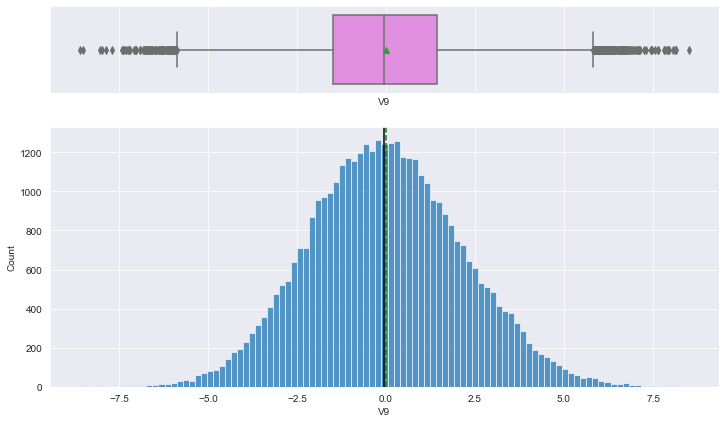

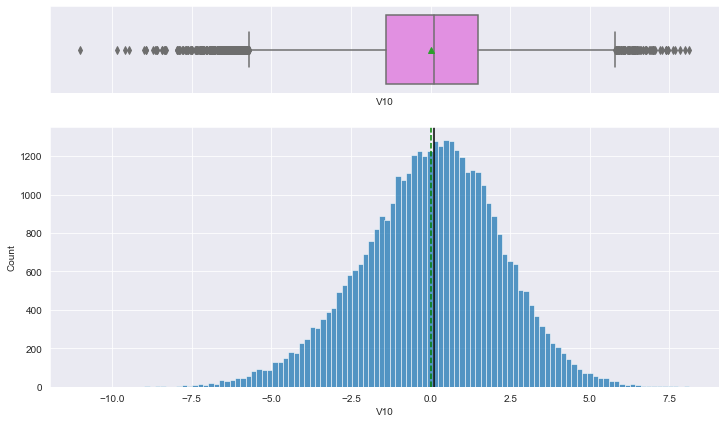

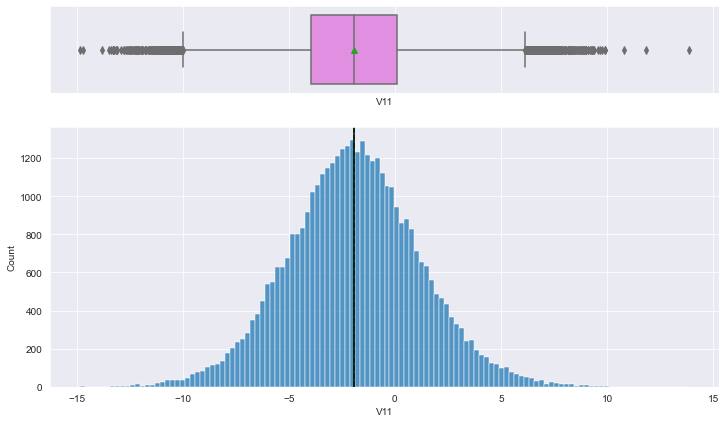

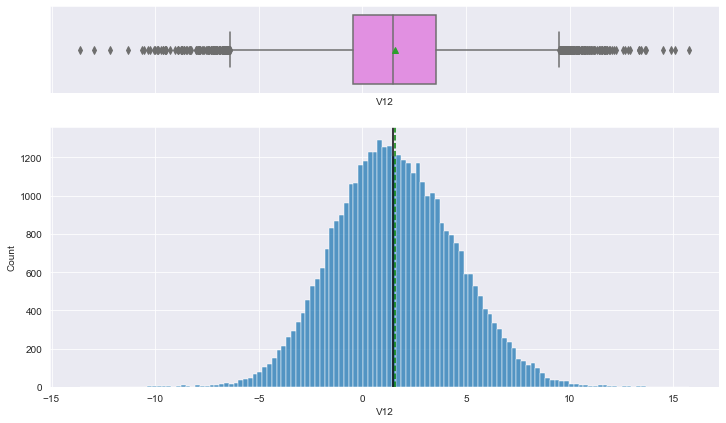

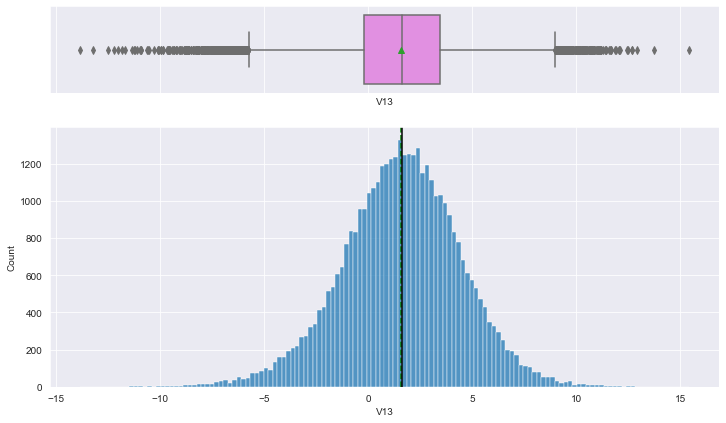

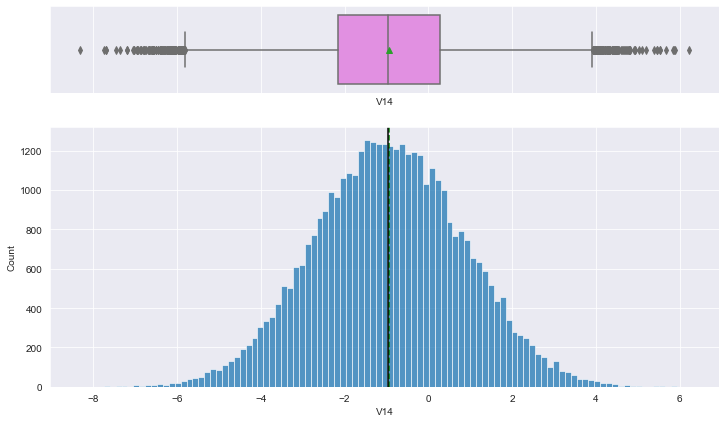

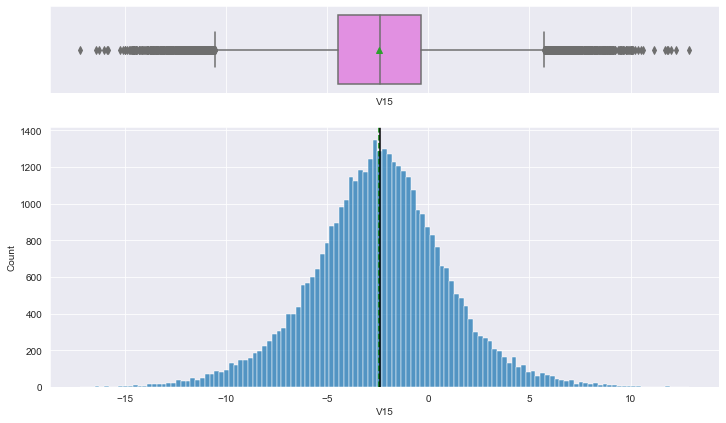

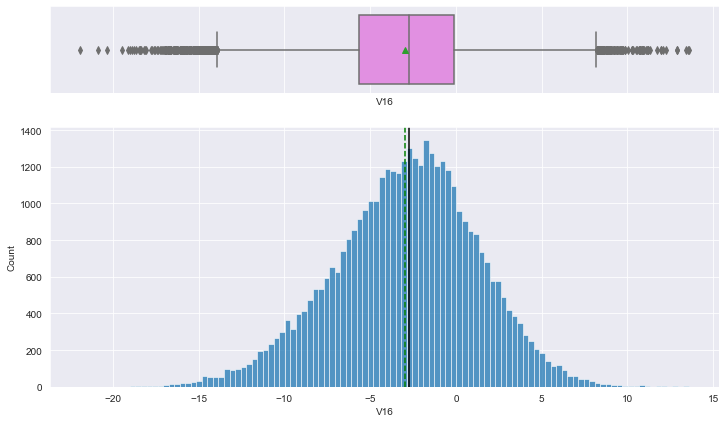

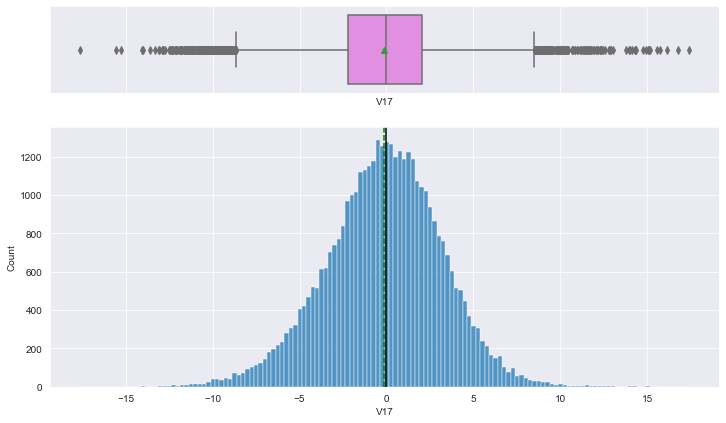

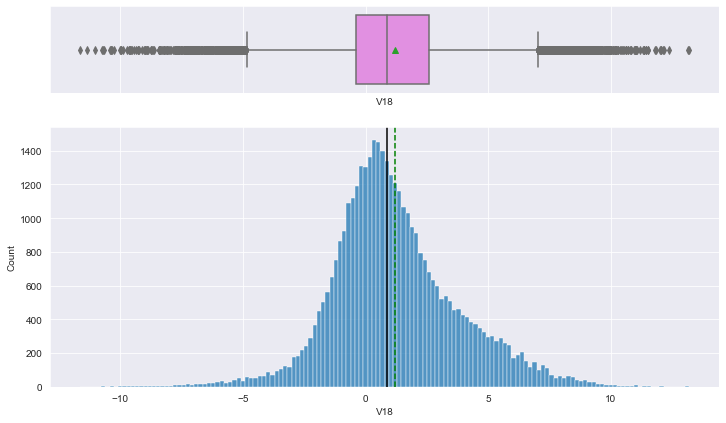

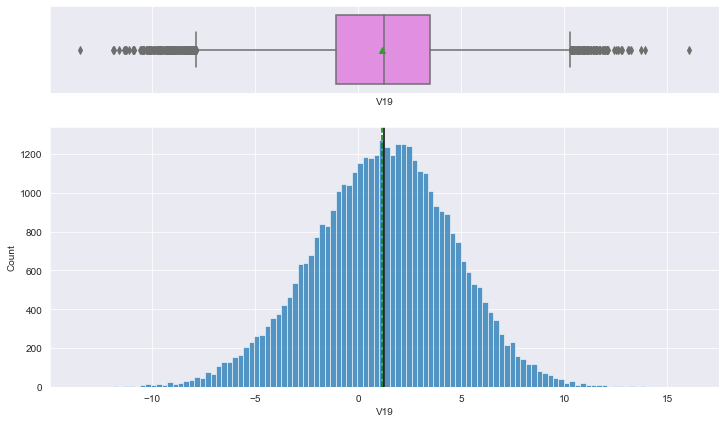

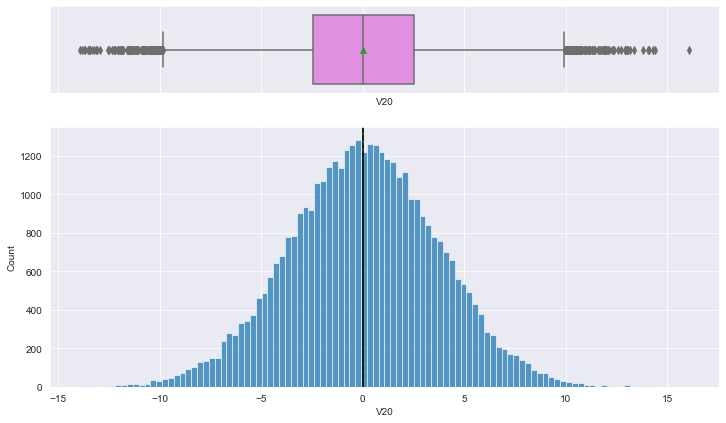

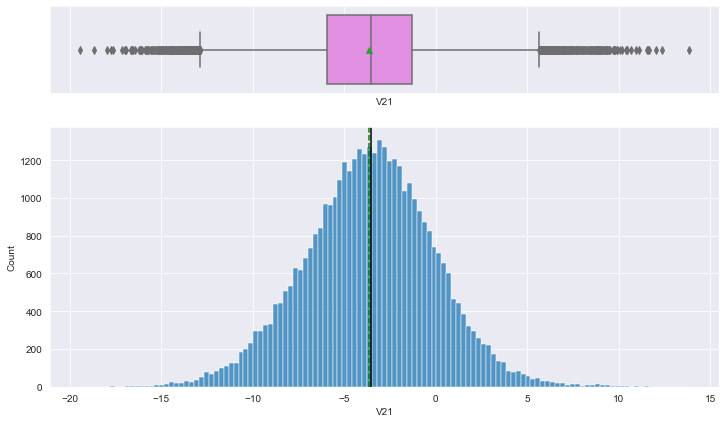

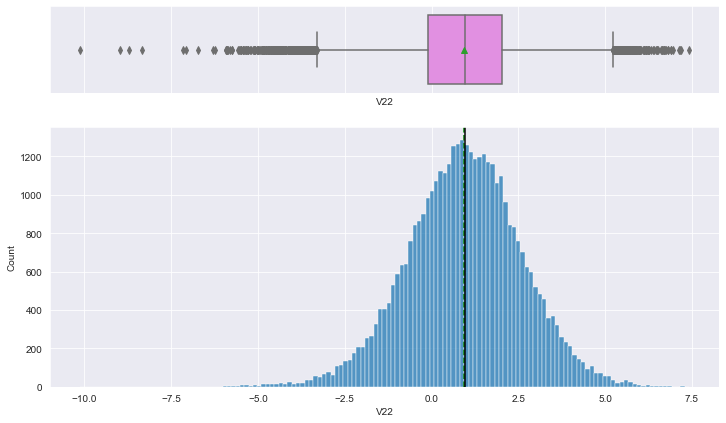

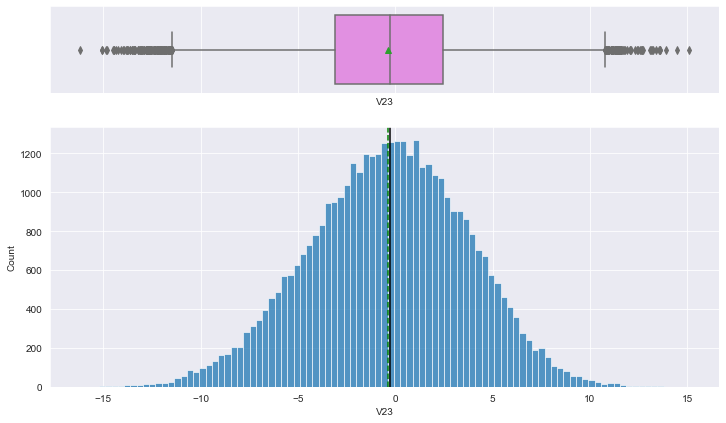

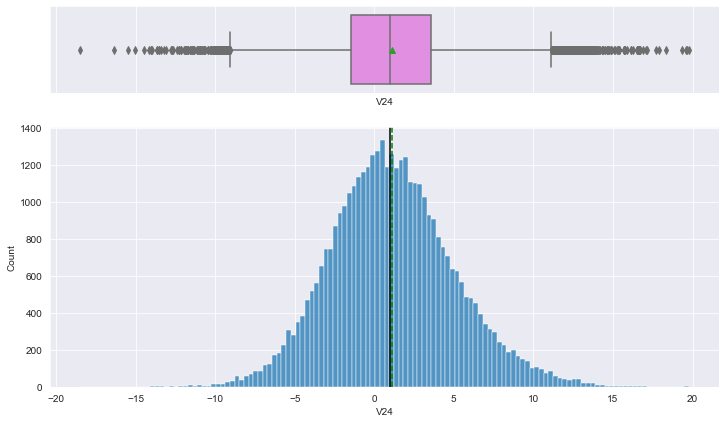

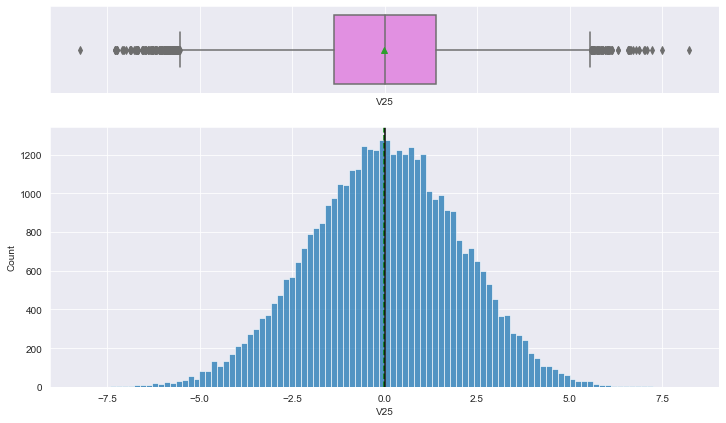

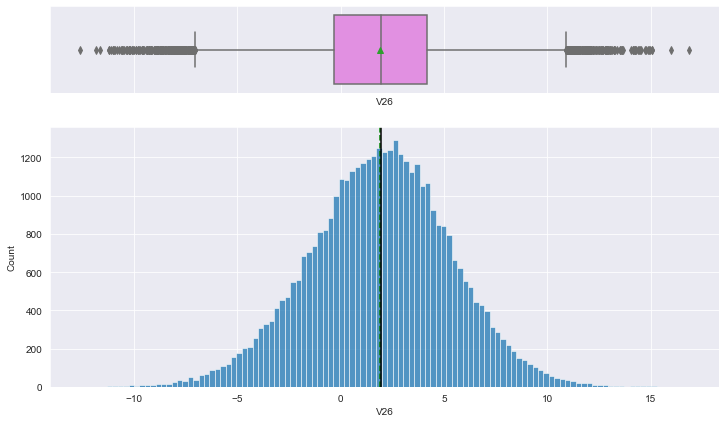

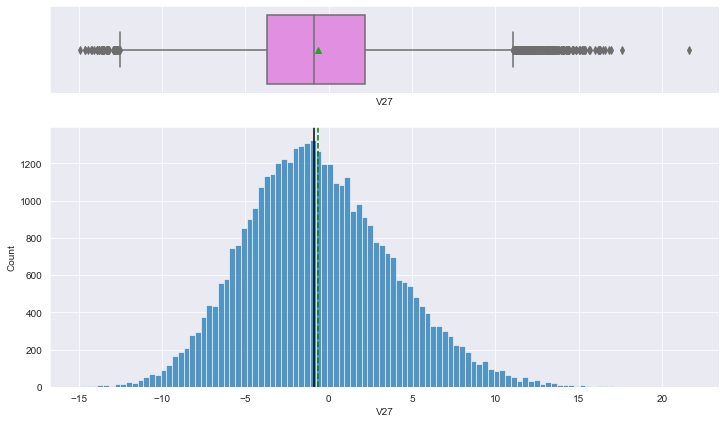

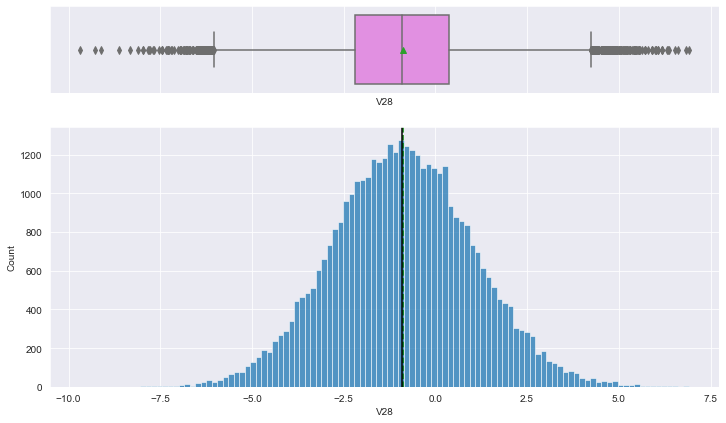

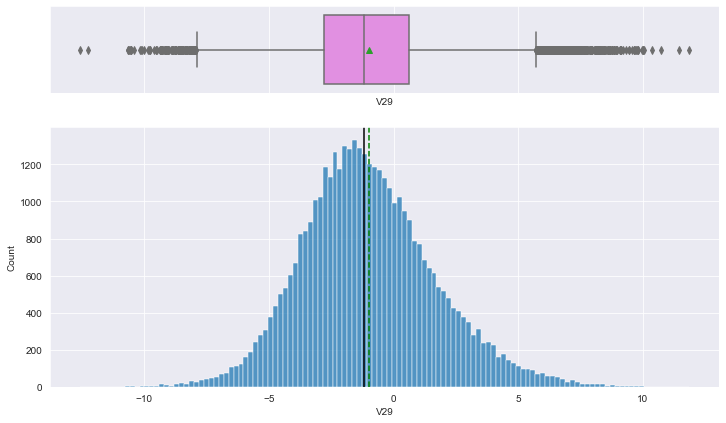

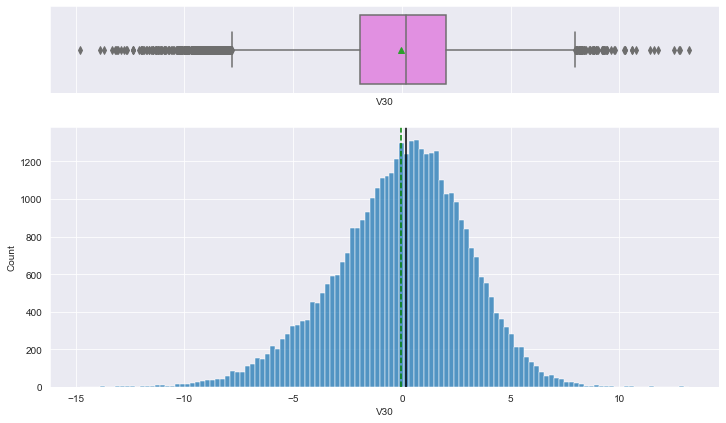

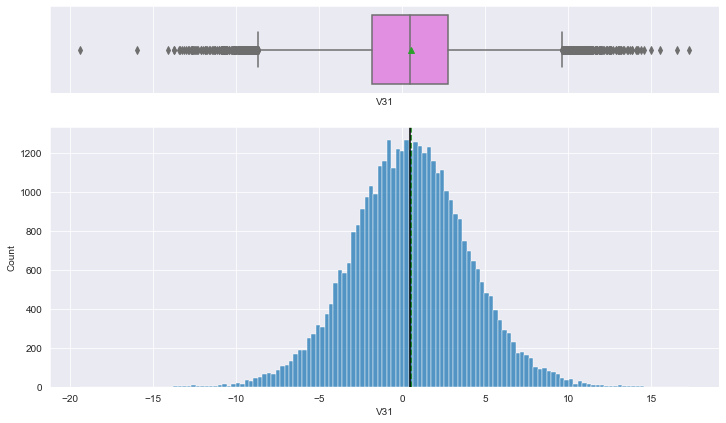

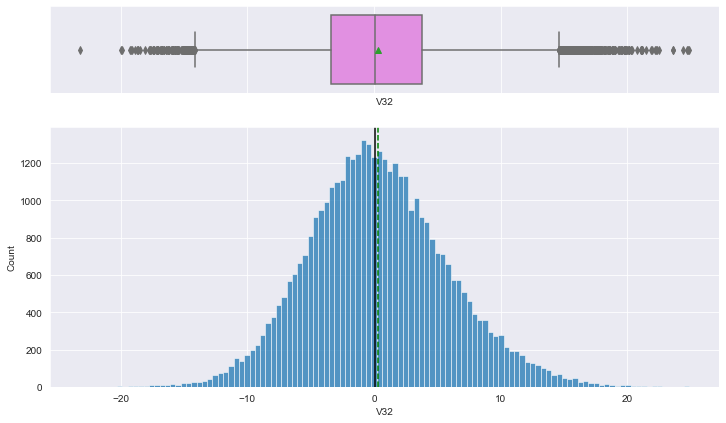

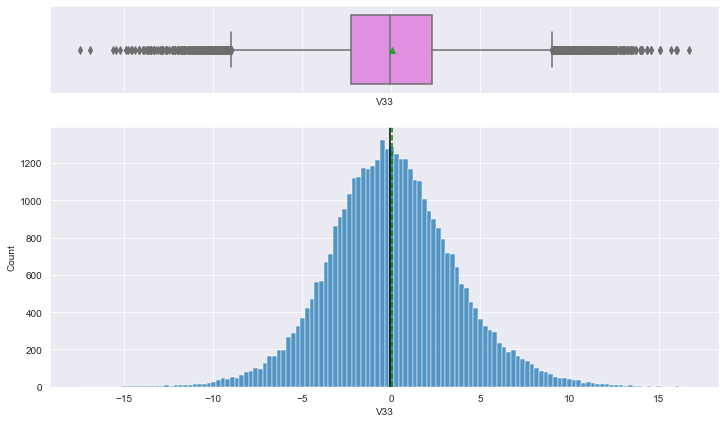

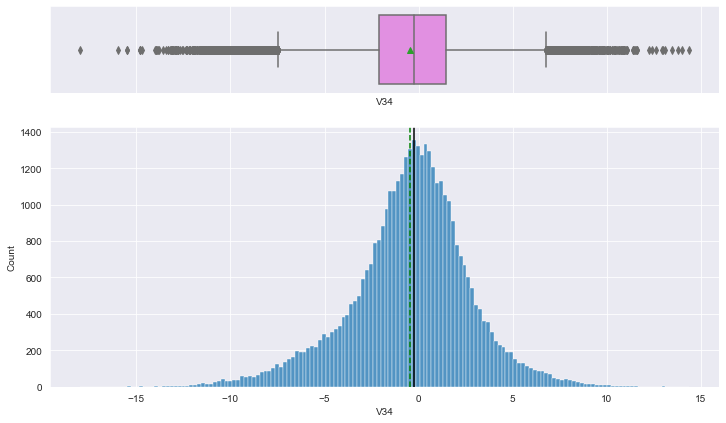

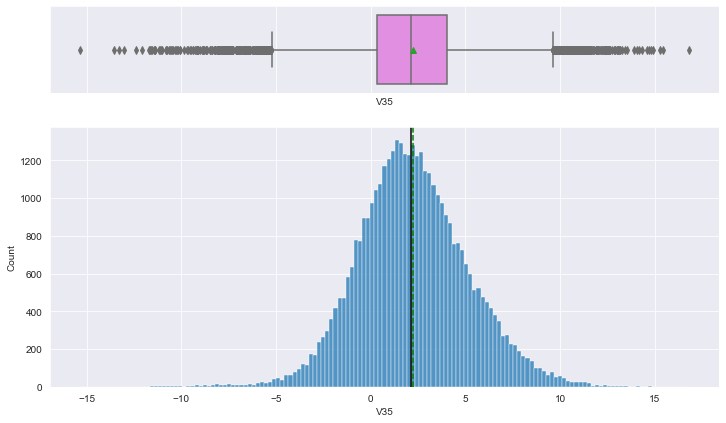

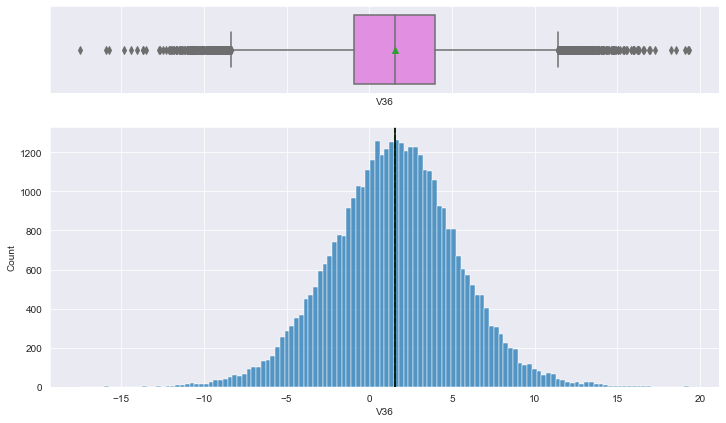

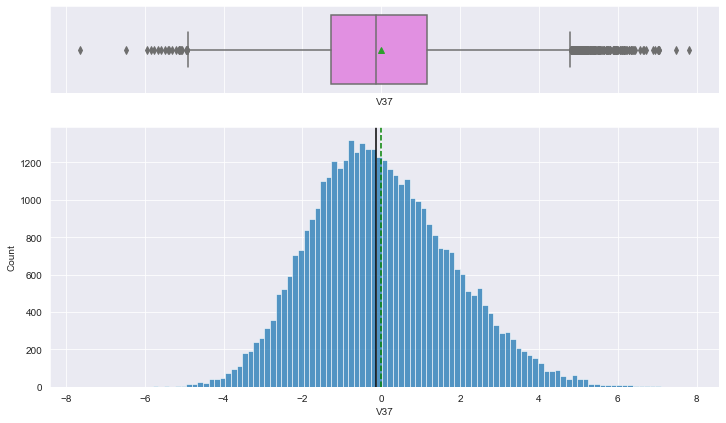

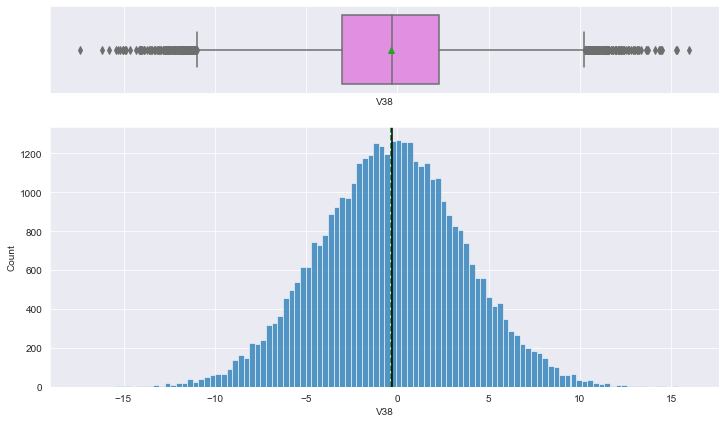

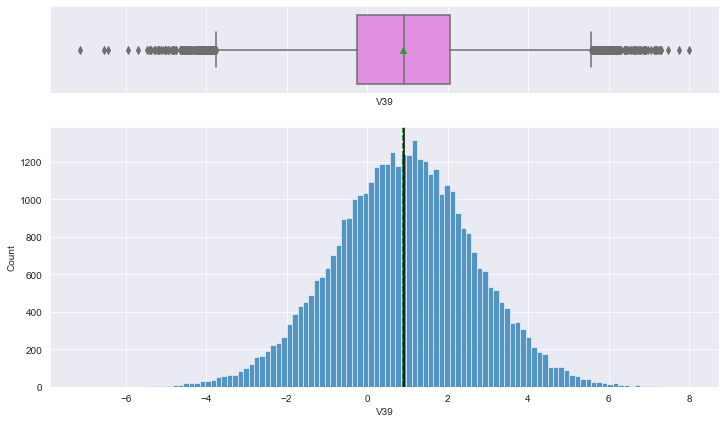

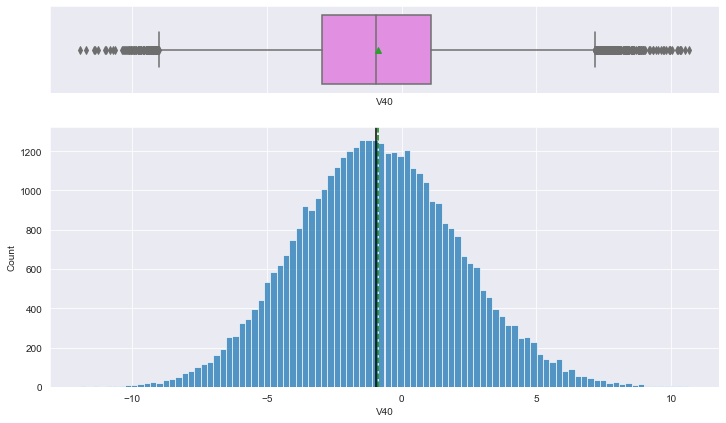

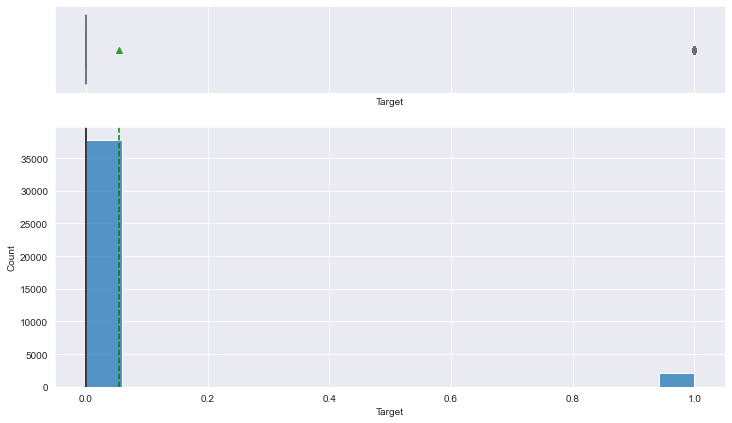

<IPython.core.display.Javascript object>

In [15]:
for feature in df.columns:
    histogram_boxplot(
        df, feature, figsize=(12, 7), kde=False, bins=None
    )  ## Please change the dataframe name as you define while reading the data

**Observations**
- As all features are ciphered, not much can be inferred from the Univariate Analysis other than:
    - All features appear to follow a normal distribution.
    - All features have outliers below and above the lower and upper whiskers of the IQR.
        - Outlier treatment will not be implemented since the variables are ciphered.

### Target Variable Distribution

In [17]:
data["Target"].value_counts()

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- Failures account for about 5.8% of the training data.

In [16]:
data_test["Target"].value_counts()

0    9453
1     547
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- Failures also account for about 5.8% of the testing data.

## Data Pre-processing

In [18]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

<IPython.core.display.Javascript object>

In [19]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=0, stratify=y
)
print(X_train.shape, X_val.shape, X_test.shape)

(26800, 40) (13200, 40) (10000, 40)


<IPython.core.display.Javascript object>

**Observations**
- Following the 75:25 split ratio rule to divide the training and validation sets:
    - Training set: 26800 observations 
    - Validation set: 13200 observations
- And the test set remains unchanged since it is independent of any transformations
    - Testing set: 10000 observations

In [20]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [21]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [22]:
# Checking that no column has missing values in training set
print(X_train.isna().sum())
print("-" * 30)

# Checking that no column has missing values in validation set
print(X_val.isna().sum())
print("-" * 30)

# Checking that no column has missing values in test set
X_test.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- No missing values are found in the training, validation, or test sets.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [23]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [25]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [26]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic Regression: 0.4996587030716723
Decision Tree: 0.7255972696245735
Random Forest: 0.759726962457338
Bagging: 0.7146757679180886
Gradient Boosting: 0.7180887372013652
XGBoost: 0.8238907849829351

Validation Performance:

Logistic Regression: 0.4709141274238227
Decision Tree: 0.7313019390581718
Random Forest: 0.7673130193905817
Bagging: 0.7409972299168975
Gradient Boosting: 0.7340720221606648
XGBoost: 0.8296398891966759


<IPython.core.display.Javascript object>

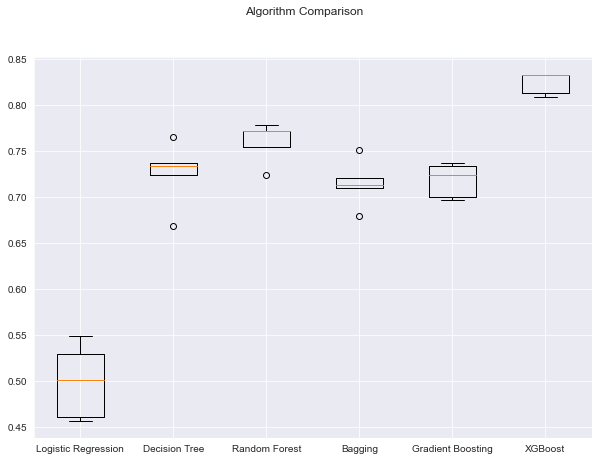

<IPython.core.display.Javascript object>

In [27]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**
- Most models did not generalize well.
    - Lowest performing model: Logistic Regression
        - Validation Performance: 0.47
    - Average performing models: Decision Tree, Random Forest, Bagging, and Gradient Boosting
        - Validation Performances: 0.73 - 0.76
    - Best performing model: XGBoost
        - Validation Performance: 0.83

### Model Building with Oversampled data


In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1465
Before OverSampling, counts of label '0': 25335 

After OverSampling, counts of label '1': 25335
After OverSampling, counts of label '0': 25335 

After OverSampling, the shape of train_X: (50670, 40)
After OverSampling, the shape of train_y: (50670,) 



<IPython.core.display.Javascript object>

In [29]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic Regression: 0.867732386027235
Decision Tree: 0.9689757252812315
Random Forest: 0.9837773830669037
Bagging: 0.9753700414446417
Gradient Boosting: 0.9241760410499309
XGBoost: 0.9878823761594632

Validation Performance:

Logistic Regression: 0.8379501385041551
Decision Tree: 0.8005540166204986
Random Forest: 0.853185595567867
Bagging: 0.832409972299169
Gradient Boosting: 0.8753462603878116
XGBoost: 0.8614958448753463


<IPython.core.display.Javascript object>

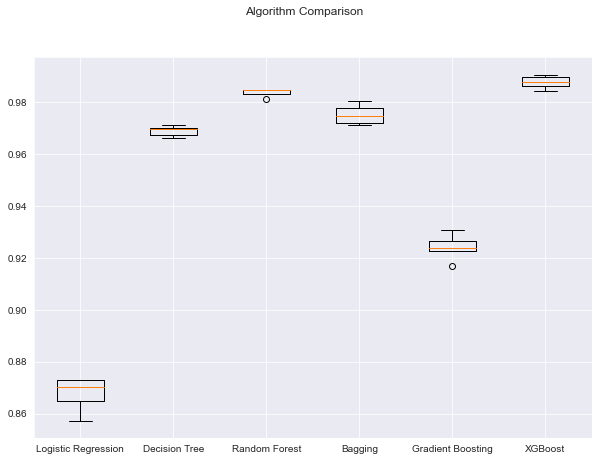

<IPython.core.display.Javascript object>

In [30]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

- Models with oversampled data did generalize better than the original models.
    - Lowest performing model: Deciosion Tree
        - Validation Performance: 0.80
    - Average performing models: Logistic Regression, Random Forest, Bagging, and XGBoost
        - Validation Performances: 0.83 - 0.86
    - Best performing model: Gradient Boosting
        - Validation Performance: 0.88

### Model Building with Undersampled data

In [31]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1465
Before UnderSampling, counts of label '0': 25335 

After UnderSampling, counts of label '1': 1465
After UnderSampling, counts of label '0': 1465 

After UnderSampling, the shape of train_X: (2930, 40)
After UnderSampling, the shape of train_y: (2930,) 



<IPython.core.display.Javascript object>

In [32]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic Regression: 0.8573378839590443
Decision Tree: 0.8641638225255972
Random Forest: 0.9030716723549487
Bagging: 0.8860068259385665
Gradient Boosting: 0.8955631399317406
XGBoost: 0.9064846416382253

Validation Performance:

Logistic Regression: 0.8559556786703602
Decision Tree: 0.8518005540166205
Random Forest: 0.889196675900277
Bagging: 0.8698060941828255
Gradient Boosting: 0.8878116343490304
XGBoost: 0.8836565096952909


<IPython.core.display.Javascript object>

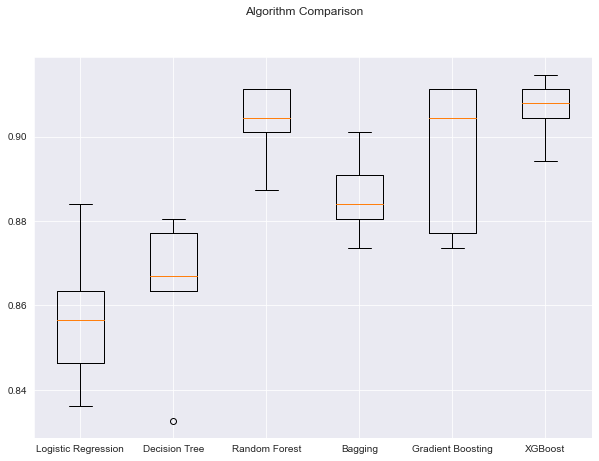

<IPython.core.display.Javascript object>

In [33]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

- Models with undersampled data generalized more optimally than the original data or oversampled data.
    - Lowest performing model: Deciosion Tree
        - Validation Performance: 0.851
    - Average performing models: Logistic Regression, Bagging, Gradient Boosting, and XGBoost
        - Validation Performances: 0.856 - 0.888
    - Best performing model: Random Forest
        - Validation Performance: 0.889

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Model Selection Overview

**The *undersampled data* models hold the optimal validation performances indicating they will generalize similarly with test data. From those results, I selected the top 3 models.**

1. Random Forest
    - Validation Performance: 0.889
2. Gradient Boosting
    - Validation Performance: 0.888
3. XGBoost
    - Validation Performance: 0.884

**However, for quality assurance purposes the top 3 models' *oversampled data* versions were also tuned.**

### Tuning Random Forest Model - Undersampled Data

In [34]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9030716723549487:
CPU times: user 1.96 s, sys: 232 ms, total: 2.19 s
Wall time: 2min 18s


<IPython.core.display.Javascript object>

In [35]:
# Creating new pipeline with best parameters
tuned_rf = RandomForestClassifier(
    n_estimators=250, min_samples_leaf=2, max_samples=0.4, max_features="sqrt",
)

tuned_rf.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=250)

<IPython.core.display.Javascript object>

In [36]:
rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.960,0.930,0.988,0.959


<IPython.core.display.Javascript object>

In [37]:
rf_val_perf = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.948,0.884,0.512,0.648


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **4.9%**

### Tuning Gradient Boosting Model - Undersampled Data

In [38]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.9017064846416382:
CPU times: user 1.63 s, sys: 80.6 ms, total: 1.71 s
Wall time: 57.2 s


<IPython.core.display.Javascript object>

In [39]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    subsample=0.5, n_estimators=125, max_features=0.7, learning_rate=0.05,
)

tuned_gbm.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.7,
                           n_estimators=125, subsample=0.5)

<IPython.core.display.Javascript object>

In [40]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_un, y_train_un
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.940,0.915,0.963,0.938


<IPython.core.display.Javascript object>

In [41]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.931,0.882,0.435,0.583


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **3.6%**

### Tuning XGBoost Model - Undersampled Data

In [42]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9276450511945393:
CPU times: user 6.74 s, sys: 154 ms, total: 6.9 s
Wall time: 8min 36s


<IPython.core.display.Javascript object>

In [43]:
xgb2 = XGBClassifier(
    subsample=0.9, scale_pos_weight=10, n_estimators=150, learning_rate=0.1, gamma=5, eval_metric="logloss",
)

xgb2.fit(X_train_un, y_train_un)

[18:48:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [44]:
xgb2_train_perf = model_performance_classification_sklearn(xgb2, X_train_un, y_train_un)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.993,1.000,0.987,0.993


<IPython.core.display.Javascript object>

In [45]:
xgb2_val_perf = model_performance_classification_sklearn(xgb2, X_val, y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.887,0.916,0.317,0.471


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **8.4%**

### Tuning Random Forest Model - Oversampled Data

In [52]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.979869745411486:
CPU times: user 45.5 s, sys: 336 ms, total: 45.9 s
Wall time: 25min 1s


<IPython.core.display.Javascript object>

In [53]:
# Creating new pipeline with best parameters
tuned_rf_over = RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_samples=0.6, max_features="sqrt",
)

tuned_rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

<IPython.core.display.Javascript object>

In [54]:
rf_train_over_perf = model_performance_classification_sklearn(
    tuned_rf_over, X_train_over, y_train_over
)
rf_train_over_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [55]:
rf_val_over_perf = model_performance_classification_sklearn(tuned_rf_over, X_val, y_val)
rf_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.861,0.944,0.901


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **13.8%**

### Tuning Gradient Boosting Model - Oversampled Data

In [56]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9643576080521019:
CPU times: user 38.9 s, sys: 347 ms, total: 39.3 s
Wall time: 16min 57s


<IPython.core.display.Javascript object>

In [57]:
# Creating new pipeline with best parameters
tuned_gbm_over = GradientBoostingClassifier(
    subsample=0.7, n_estimators=125, max_features=0.7, learning_rate=1,
)

tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           subsample=0.7)

<IPython.core.display.Javascript object>

In [58]:
gbm_train_over_perf = model_performance_classification_sklearn(
    tuned_gbm_over, X_train_over, y_train_over
)
gbm_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.978,0.974,0.983,0.978


<IPython.core.display.Javascript object>

In [59]:
gbm_val_over_perf = model_performance_classification_sklearn(
    tuned_gbm_over, X_val, y_val
)
gbm_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.964,0.868,0.620,0.723


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **10.9%**

### Tuning XGBoost Model - Oversampled Data

In [60]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9966054864811525:
CPU times: user 2min 51s, sys: 935 ms, total: 2min 52s
Wall time: 11h 21min 37s


<IPython.core.display.Javascript object>

In [61]:
xgb2_over = XGBClassifier(
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
    eval_metric="logloss",
)

xgb2_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [62]:
xgb2_train_over_perf = model_performance_classification_sklearn(
    xgb2_over, X_train_over, y_train_over
)
xgb2_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.997,1.000,0.993,0.997


<IPython.core.display.Javascript object>

In [63]:
xgb2_val_over_perf = model_performance_classification_sklearn(xgb2_over, X_val, y_val)
xgb2_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.975,0.878,0.727,0.795


<IPython.core.display.Javascript object>

**Observations**
- In comparing the training to validation performance, the recall performance is reduced by **12.2%**

## Model performance comparison and choosing the final model

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_train_over_perf.T,
        gbm_train_perf.T,
        gbm_train_over_perf.T,
        xgb2_train_perf.T,
        xgb2_train_over_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Tuned with Undersampled Data",
    "Random Forest Tuned with Oversampled Data",
    "Gradient Boosting Tuned with Undersampled data",
    "Gradient Boosting Tuned with Oversampled data",
    "XGBoost Tuned with Undersampled Data",
    "XGBoost Tuned with Oversampled Data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Tuned with Undersampled Data,Random Forest Tuned with Oversampled Data,Gradient Boosting Tuned with Undersampled data,Gradient Boosting Tuned with Oversampled data,XGBoost Tuned with Undersampled Data,XGBoost Tuned with Oversampled Data
Accuracy,0.960,1.000,0.940,0.978,0.993,0.997
Recall,0.930,0.999,0.915,0.974,1.000,1.000
Precision,0.988,1.000,0.963,0.983,0.987,0.993
F1,0.959,1.000,0.938,0.978,0.993,0.997


<IPython.core.display.Javascript object>

In [65]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_val_perf.T,
        rf_val_over_perf.T,
        gbm_val_perf.T,
        gbm_val_over_perf.T,
        xgb2_val_perf.T,
        xgb2_val_over_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest Tuned with Undersampled Data",
    "Random Forest Tuned with Oversampled Data",
    "Gradient Boosting Tuned with Undersampled data",
    "Gradient Boosting Tuned with Oversampled data",
    "XGBoost Tuned with Undersampled Data",
    "XGBoost Tuned with Oversampled Data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Random Forest Tuned with Undersampled Data,Random Forest Tuned with Oversampled Data,Gradient Boosting Tuned with Undersampled data,Gradient Boosting Tuned with Oversampled data,XGBoost Tuned with Undersampled Data,XGBoost Tuned with Oversampled Data
Accuracy,0.948,0.990,0.931,0.964,0.887,0.975
Recall,0.884,0.861,0.882,0.868,0.916,0.878
Precision,0.512,0.944,0.435,0.620,0.317,0.727
F1,0.648,0.901,0.583,0.723,0.471,0.795


<IPython.core.display.Javascript object>

**Observations**
- General Overview
    - In comparing training to validation performance:
        - Undersampled models on average demonstrate a 5.6% reduction in the recall performance. 
        - Oversampled models on average demonstrate a 12.3% reduction in the recall performance.
- Best Performing Model 
    - XGBoost Tuned with Undersampled Data
        - Although it does show an 8.4% reduction in the recall performance, it has the highest recall score in the validation performance among all other models.
        - We want the most optimal recall score to reduce false negatives therefore lowering the maintenance costs of a generator completely failing. 

### Best Performing Model - Final Overview

In [86]:
# Overview of the best performing model
print("XGBoost Tuned with Undersampled Test Data Performance:")
xgb2_test_perf = model_performance_classification_sklearn(xgb2, X_test, y_test)
xgb2_test_perf

XGBoost Tuned with Undersampled Test Data Performance:


,Accuracy,Recall,Precision,F1
0,0.885,0.899,0.310,0.461


<IPython.core.display.Javascript object>

**Observations**
- Our model demonsrates a recall performance score of 0.899 on the unseen/test data. 
- Again, our goal is to optimize "Recall" or reduce false negatives.

### Feature Importances 

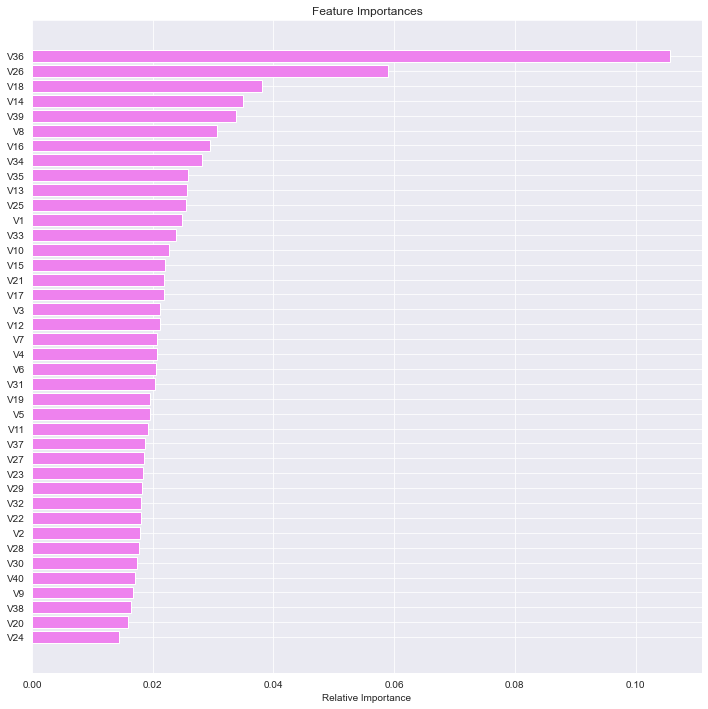

<IPython.core.display.Javascript object>

In [68]:
feature_names = X_train.columns
importances = (
    xgb2.feature_importances_
)  ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
- The top three predictors in our model are V36, V26, and V18. 
- Again, the predictors are ciphered therefore there isn't much more that can be inferred from this observation. 

## Pipelines to build the final model


- Column transformer is not used since there is only one datatype.

In [69]:
Model = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "XGBoost Tuned with Undersampled Data",
            XGBClassifier(
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=150,
                learning_rate=0.1,
                gamma=5,
                eval_metric="logloss",
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [70]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test
X_test1 = df_test.drop(columns="Target")
y_test1 = df_test["Target"]

<IPython.core.display.Javascript object>

In [71]:
# We can't undersample data without doing missing value treatment,
# so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X2 = imputer.fit_transform(X_test1)

<IPython.core.display.Javascript object>

In [72]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un1, y_train_un1 = rus.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [73]:
# fit the pipeline model
Model.fit(X_train_un1, y_train_un1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost Tuned with Undersampled Data',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

<IPython.core.display.Javascript object>

In [74]:
# pipe object's accuracy on the train set
Model.score(X_train_un1, y_train_un1)

0.9919981710105167

<IPython.core.display.Javascript object>

In [75]:
# pipe object's accuracy on the test set
Model.score(X2, y_test1)

0.8827

<IPython.core.display.Javascript object>

In [78]:
# predict on the test data using the model in production
Model.predict(X2)

array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>

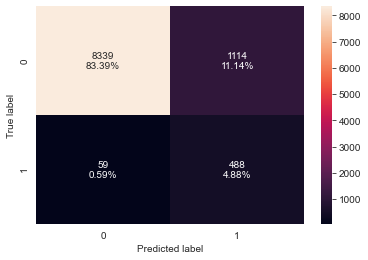

<IPython.core.display.Javascript object>

In [76]:
confusion_matrix_sklearn(Model, X2, y_test1)

**Observations** 
- The XGBoost model (w/ undersampled data) in production, shows a *recall score* of 0.892 on test data. 
    - Complementary to the validation performance score of 0.916
    - Our results are optimal since only a 2.6% reduction in recall performance. 

# Business Insights and Conclusions

The objective was to build various classification models, tune them, and find the best one that would help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

**Maintenance Costs with no ML Model**
- Inspection Costs = 0 USD
- Repair Costs = 0 USD
- Replacement Costs = 547 (Failures) x 40,000 (Replacement Cost) = 21,880,000 USD
- **Total Costs** = 21,880,000

**Maintenance Costs with XGBoost Model (Undersampled Data)**
- Inspection Costs = 1,114 (False Positives) x 5,000 (Inspection Cost) = 5,570,000 USD 
- Repair Costs = 488 (True Positives) x 15,000 (Repair Cost) = 7,320,000 USD
- Replacement Costs = 59 (False Negatives) x 40,000 (Replacement Cost) = 2,360,000 USD
- **Total Costs** = 15,250,000
    - **30% reduction in maintenance costs**
    
**Recommendations**
1. Deploy the XGBoost model with undersampled data into production.
    - Metrics indicate the likelihood of a **30% (6.6 million USD) reduction in maintenance costs.**
2. Further investigate the top three predictors; V36, V26, and V18. Potentially uncover thresholds for these predictors to classify non-failures and failures. 
3. Although the predictors are ciphered, here are some new data sources (sensors) that could be implemented to improve the model. 
    - Oil and grease levels monitoring sensor 
    - Vibration sensor to better predict gearbox failure
4. Expand the business model
    - Develop an app that uses the predictive model as a tool to facilitate other business processes. 
        - Plan the inspection process
        - Crew deployment
        - Ordering and managing inventory

***